## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('bank-additional-full.csv', sep=';')

In [86]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [87]:
dataset['y'] = dataset['y'].map({'no': 0, 'yes': 1})

unique_values_y = dataset['y'].unique()
print("Unique values in 'y':", unique_values_y)
print(dataset.head())

Unique values in 'y': [0 1]
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [88]:
bank_client = ['age', 'job', 'education', 'default', 'marital', 'loan', 'housing' ]

client_info = dataset[bank_client]

for feature in client_info:
    unique_entries = client_info[feature].unique()
    print(f"List of unique {feature} options: {unique_entries}")

List of unique age options: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
List of unique job options: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
List of unique education options: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
List of unique default options: ['no' 'unknown' 'yes']
List of unique marital options: ['married' 'single' 'divorced' 'unknown']
List of unique loan options: ['no' 'yes' 'unknown']
List of unique housing options: ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

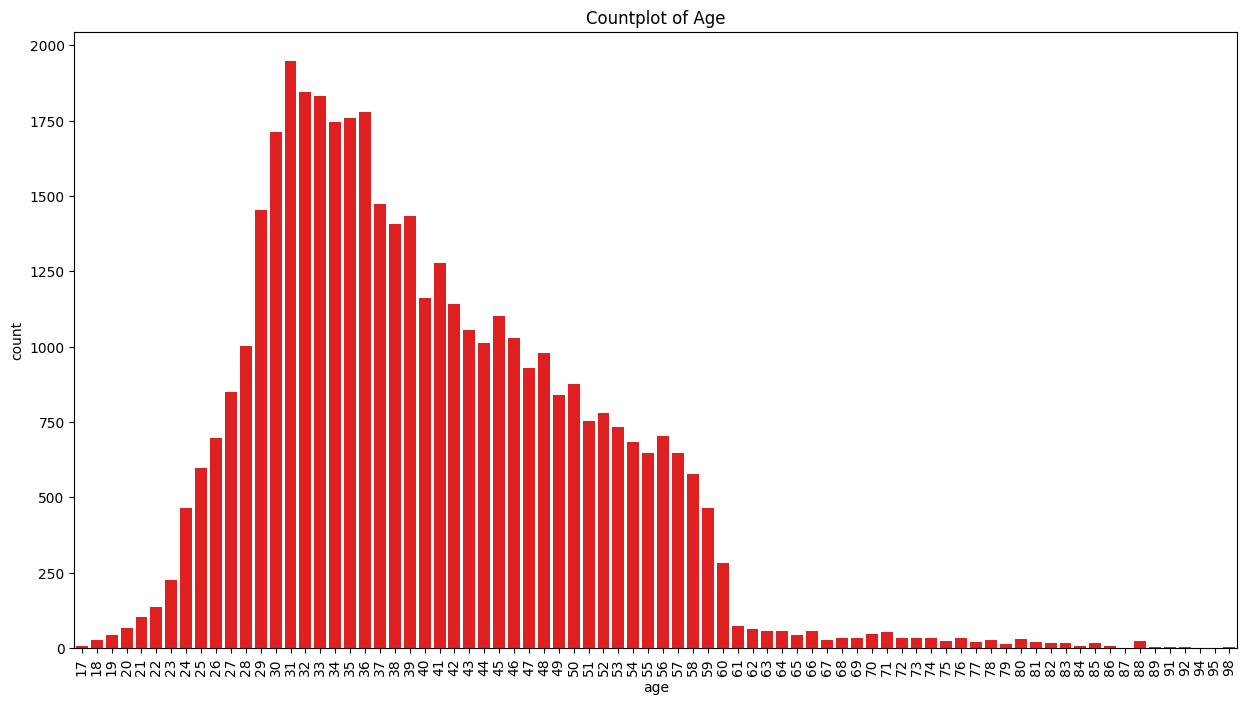

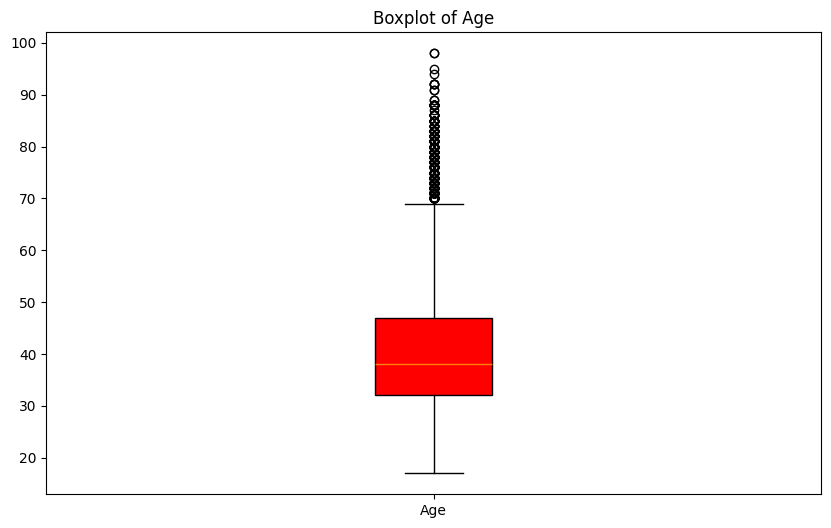

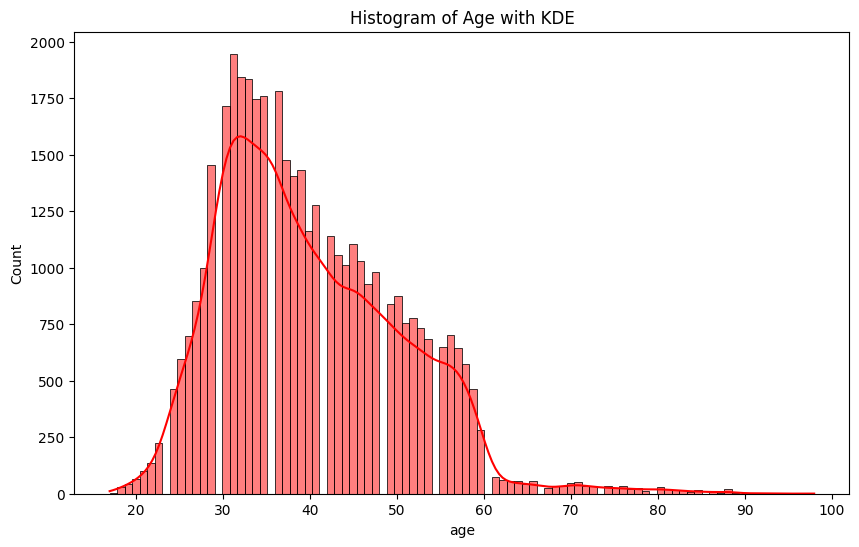

In [89]:
max_age = dataset['age'].max()
min_age = dataset['age'].min()
nan_count = dataset['age'].isna().sum()

plt.figure(figsize=(15, 8))
sns.countplot(x='age', data=dataset, color='red')
plt.title('Countplot of Age')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(dataset['age'].dropna(), patch_artist=True, boxprops=dict(facecolor='red'))  
plt.title('Boxplot of Age')
plt.xticks([1], ['Age'])
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(dataset['age'], kde=True, color='red', line_kws={"color": "red"})  
plt.title('Histogram of Age with KDE')
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   На основі результатів `dataset.describe()` можна зробити короткий висновок про статистичні дані набору даних. Ця функція зазвичай надає інформацію про кількість, середнє значення, стандартне відхилення, мінімальне значення та максимальне значення для кожного числового стовпця в наборі даних. Ці статистичні дані допомагають нам зрозуміти розподіл, центральну тенденцію та варіативність даних. 
2.   Код замінює категоріальні значення в колонці 'y' датасету на числові, замінюючи 'no' на 0 та 'yes' на 1. Потім виводить унікальні значення в оновленій колонці 'y' та відображає перші кілька рядків датасету. На основі виведення, ми можемо спостерігати, що цільова змінна 'y' тепер містить бінарні значення 0 та 1.
3. Максимальний та мінімальний вік клієнтів банку визначається за допомогою max age та min age відповідно.
Для візуалізації розподілу віку клієнтів створюються графіки countplot, боксплот та гістограма з ядерною щільністю за допомогою бібліотек matplotlib та seaborn.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [122]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame, column: str, low_percentile: int, high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers
    """
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")

    IQR = Q3 - Q1
    print("Interquantile range:", IQR)

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print("Lower bound:", low_lim)
    print("Upper bound:", up_lim)

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print("Outliers in the dataset:")
    display(outliers)

    return outliers

In [123]:
outliers = detect_outliers_with_interquantile_range(client_info, 'age', 10, 90)

Q1 10 percentile of the given data: 28.0
Q3 90 percentile of the given data: 55.0
Interquantile range: 27.0
Lower bound: -12.5
Upper bound: 95.5
Outliers in the dataset:


,age,job,education,default,marital,loan,housing,age_quartiles
38452,98,5,0,1,1,0,2,Q4 (above 75th percentile)
38455,98,5,0,1,1,0,2,Q4 (above 75th percentile)


**Висновки з завдання 5 (детальні)**

 Ця функція `detect_outliers_with_interquantile_range` використовується для виявлення викидів в датасеті за допомогою інтерквантильного діапазону. Функція приймає DataFrame`df`, назву стовпчика `column`, в якому потрібно шукати викиди, та нижню і верхню межі перцентилів `low_percentile` і `high_percentile`.

Спочатку дані сортуються за значенням стовпчика `column`. Потім обчислюються перцентилі `Q1` і `Q3` за допомогою функції `np.percentile()`. Інтерквантильний діапазон `IQR` обчислюється як різниця між `Q3` і `Q1`. Нижня і верхня межі викидів обчислюються за формулами `Q1 - 1.5 * IQR` і `Q3 + 1.5 * IQR` відповідно.

Викиди визначаються як ті рядки DataFrame, значення яких в стовпчику `column` виходять за межі нижньої або верхньої межі викидів. Ці викиди виводяться на екран і повертаються як результат роботи функції.

Отже, функція `detect_outliers_with_interquantile_range` дозволяє виявити викиди в датасеті за допомогою інтерквантильного діапазону, встановленого вручну. Це корисно для виявлення аномальних значень в даних, які можуть впливати на результати аналізу.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

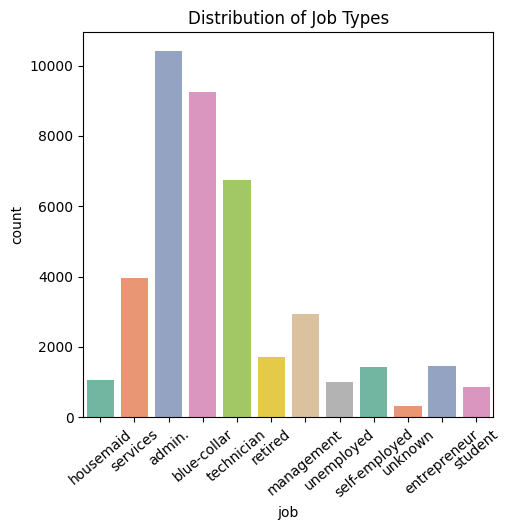

In [92]:
plt.figure(figsize=(18, 5))  

plt.subplot(1, 3, 1)  
sns.countplot(x='job', data=dataset, palette='Set2')
plt.title('Distribution of Job Types')
plt.xticks(rotation=40)  

plt.show()

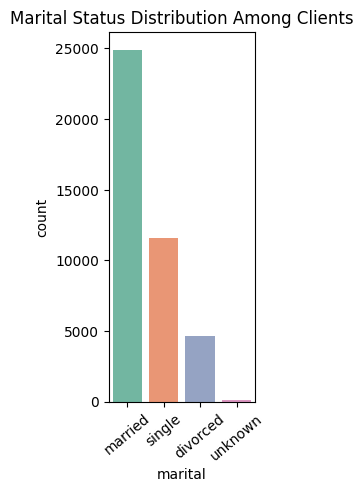

In [65]:
plt.subplot(1, 3, 2) 
sns.countplot(x='marital', data=dataset, palette='Set2')
plt.title('Marital Status Distribution Among Clients')
plt.xticks(rotation=40)

plt.show()

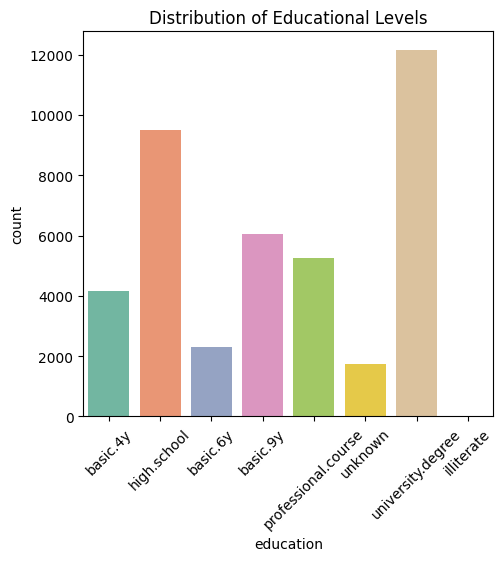

In [66]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 3)
sns.countplot(x='education', data=dataset, palette='Set2')
plt.title('Distribution of Educational Levels')
plt.xticks(rotation=45)

plt.show()

**Висновки з завдання 6 (детальні)**

1.   На основі графіка розподілу типів робіт можна зробити висновок про те, що існує певна різноманітність робіт, які виконуються для клієнтів. Деякі типи робіт є більш поширеними, ніж інші, що вказує на те, що існують певні тенденції в попиті на різні види робіт. Аналіз графіка дозволяє виявити ці тенденції та зробити висновки про те, які типи робіт є найважливішими для клієнтів. Ця інформація може бути корисною для планування бізнес-стратегій та оптимізації робочих процесів.
2.   Графік дозволяє швидко оцінити розподіл статусу подружнього стану серед клієнтів. Кожному статусу подружнього стану відповідає стовпчик, який відображає кількість клієнтів, що відповідають цьому статусу.
3. На основі графіка розподілу рівня освіти можна зробити висновки про розподіл, популярність та тенденції різних рівнів освіти серед клієнтів. Цей графік допомагає отримати візуальне уявлення про розподіл рівня освіти у ваших даних та робити висновки щодо їх важливості та взаємозв'язків з іншими змінними.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

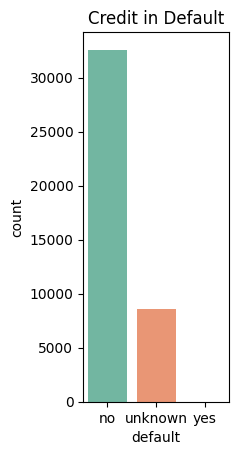

In [67]:
plt.subplot(1, 3, 1) 
sns.countplot(x='default', data=dataset, palette='Set2')
plt.title('Credit in Default')

plt.show()

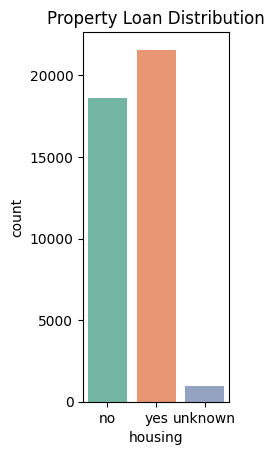

In [68]:
plt.subplot(1, 3, 2) 
sns.countplot(x='housing', data=dataset, palette='Set2')
plt.title('Property Loan Distribution')

plt.show()

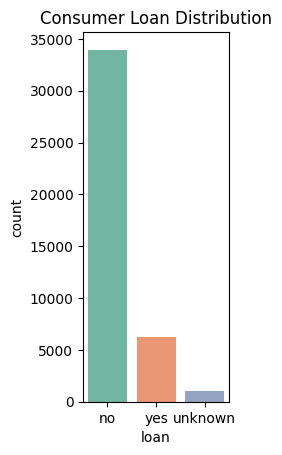

In [69]:
plt.subplot(1, 3, 3)  
sns.countplot(x='loan', data=dataset, palette='Set2')
plt.title('Consumer Loan Distribution')

plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [96]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = df[col].fillna('Missing')
        df[col] = le.fit_transform(df[col])
        df[col] = df[col].where(df[col] != 'Missing')
    
    return df

In [98]:
bank_client_encoded = encode_categorical_columns(client_info, ['job', 'marital', 'education', 'default', 'housing', 'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [108]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding the age column using its quartile values.
    
    dataframe: pd.DataFrame to encode
    age_col: name of the age column to encode
    
    This function adds a new column 'age_quartiles' to the DataFrame with the categorical age data.
    """
    if age_col not in dataframe.columns:
        raise ValueError(f"The column {age_col} does not exist in the DataFrame.")

    Q1 = dataframe[age_col].quantile(0.25)
    Q2 = dataframe[age_col].quantile(0.50)
    Q3 = dataframe[age_col].quantile(0.75)

    def categorize_age(age):
        if age <= Q1:
            return 'Q1 (25th percentile or below)'
        elif Q1 < age <= Q2:
            return 'Q2 (25th to 50th percentile)'
        elif Q2 < age <= Q3:
            return 'Q3 (50th to 75th percentile)'
        else:
            return 'Q4 (above 75th percentile)'

    dataframe['age_quartiles'] = dataframe[age_col].apply(categorize_age)

    return dataframe



In [110]:
bank_client_encoded = encode_age(client_info, 'age')

**Висновки з завдання 9 (детальні)**
Функція `encode_age` використовується для кодування колонки віку в датафреймі на основі її квартильних значень. Функція приймає два аргументи: датафрейм `dataframe` та назву колонки віку `age_col`. Функція обчислює квартильні значення для колонки віку, визначає допоміжну функцію `categorize_age()` для призначення категоріальних значень на основі квартильних значень, застосовує цю функцію до колонки віку та повертає закодований датафрейм з новою колонкою 'age\_quartiles'.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [117]:
bank_relat = dataset[['duration', 'campaign', 'pdays', 'previous', 'poutcome']]

print("DataFrame showing bank-client interaction variables:")
print(bank_relat.head()) 


nan_counts = bank_relat.isna().sum()
print("\nNaN counts in bank-client interaction variables:")
print(nan_counts)

DataFrame showing bank-client interaction variables:
   duration  campaign  pdays  previous     poutcome
0       261         1    999         0  nonexistent
1       149         1    999         0  nonexistent
2       226         1    999         0  nonexistent
3       151         1    999         0  nonexistent
4       307         1    999         0  nonexistent

NaN counts in bank-client interaction variables:
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [87]:
columns_of_interest = ['contact', 'month', 'day_of_week']

for column in columns_of_interest:
    unique_values = dataset[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in contact: ['telephone' 'cellular']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



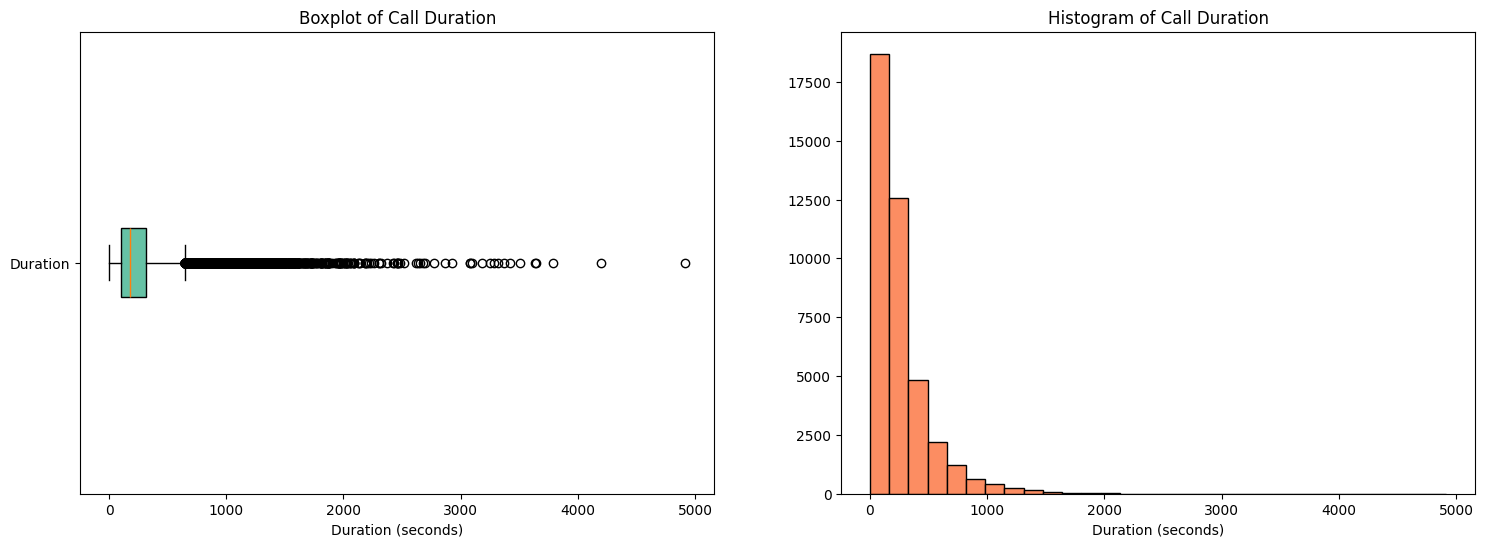

In [57]:
plt.figure(figsize=(18, 6))

colors = ['#66c2a5', '#fc8d62']  

plt.subplot(1, 2, 1)
plt.boxplot(dataset['duration'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor=colors[0]))
plt.title('Boxplot of Call Duration')
plt.xlabel('Duration (seconds)')
plt.gca().set_yticklabels(['Duration'])  


plt.subplot(1, 2, 2) 
plt.hist(dataset['duration'].dropna(), bins=30, color=colors[1], edgecolor='black')
plt.title('Histogram of Call Duration')
plt.xlabel('Duration (seconds)')

plt.show()

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [19]:
bank_client_new = encode_categorical_columns(dataset, ['month', 'contact', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [118]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding 'duration' column 
    
    dataframe: pd.DataFrame to encode
    
    duration_col: 'duration' column to encode
    """
    Q1 = dataframe[duration_col].quantile(0.25)
    Q2 = dataframe[duration_col].quantile(0.5)
    Q3 = dataframe[duration_col].quantile(0.75)

    def quartile_encoding(x):
        if x <= Q1:
            return 0
        elif Q1 < x <= Q2:
            return 1
        elif Q2 < x <= Q3:
            return 2
        else:
            return 3

    dataframe[duration_col + '_encoded'] = dataframe[duration_col].apply(quartile_encoding)
          
    return dataframe

In [121]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [45]:
bank_socec = dataset[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [46]:
bank_other = dataset[['campaign', 'pdays', 'previous', 'poutcome']]


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [47]:
poutcome_encoded = pd.get_dummies(dataset['poutcome'], prefix='poutcome')


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [48]:
bank_final = pd.concat([bank_socec, poutcome_encoded], axis=1)


**Завдання 19** Провести ділення вибірки

In [49]:

def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

target = dataset['y']  



In [50]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [51]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [52]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [53]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7226   53]
 [ 801  158]]
90.0


## k-NN

k=1 83.60 (+/- 2.34)
k=2 89.17 (+/- 0.70)
k=3 88.72 (+/- 0.66)
k=4 89.42 (+/- 0.60)
k=5 88.92 (+/- 0.89)
k=6 89.56 (+/- 0.63)
k=7 89.48 (+/- 0.58)
k=8 89.76 (+/- 0.65)
k=9 89.64 (+/- 0.67)
k=10 89.79 (+/- 0.63)
k=11 89.72 (+/- 0.62)
k=12 89.86 (+/- 0.61)
k=13 89.79 (+/- 0.64)
k=14 89.89 (+/- 0.58)
k=15 89.77 (+/- 0.58)
k=16 89.91 (+/- 0.62)
k=17 89.80 (+/- 0.58)
k=18 89.98 (+/- 0.56)
k=19 89.88 (+/- 0.56)
k=20 90.00 (+/- 0.58)
k=21 89.83 (+/- 0.66)
k=22 89.93 (+/- 0.65)
k=23 89.90 (+/- 0.60)
k=24 89.92 (+/- 0.64)
k=25 89.78 (+/- 0.64)
The optimal number of neighbors is 19 with 90.0%


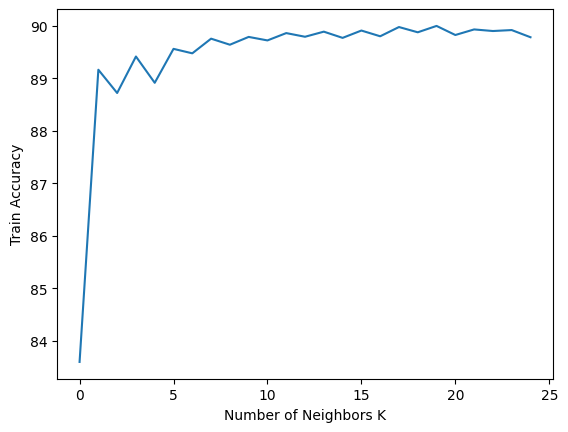

In [54]:
neighbors = np.arange(0,25)

cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [55]:
n = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7145  134]
 [ 726  233]]
90.0


## Логістична Регресія

In [56]:
models = pd.DataFrame({
                'Models': 'LogisticRegression',
                'Score':  [LOGCV]}) 

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LogisticRegression,0.8967


**Висновки по моделям (детальні)**

1. Для кожного значення K від 1 до 25 обчислюється середня точність перехресного перевірювання. Оптимальним є значення K, за якого середня точність є найвищою. Графік демонструє, що точність зростає зі збільшенням кількості сусідів, але після певного моменту стабілізується або зменшується.  
2. Точність моделі на тестовому датасеті становить [accuracy_score]%, а середня точність моделі при перехресному перевірюванні становить [KNNCV]%. Це означає, що модель KNN добре працює на цьому датасеті та демонструє високу точність. 
3.  Створено таблицю, яка містить інформацію про модель логістичної регресії та її точність при перехресному перевірюванні. Таблиця відсортована за зменшенням точності моделі.